# Dicussion Week 2:

In [2]:
library ("igraph")
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'pracma' was built under R version 3.6.2"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



[1] FALSE
[1] "p=0.005: connected=FALSE, diameter=9"


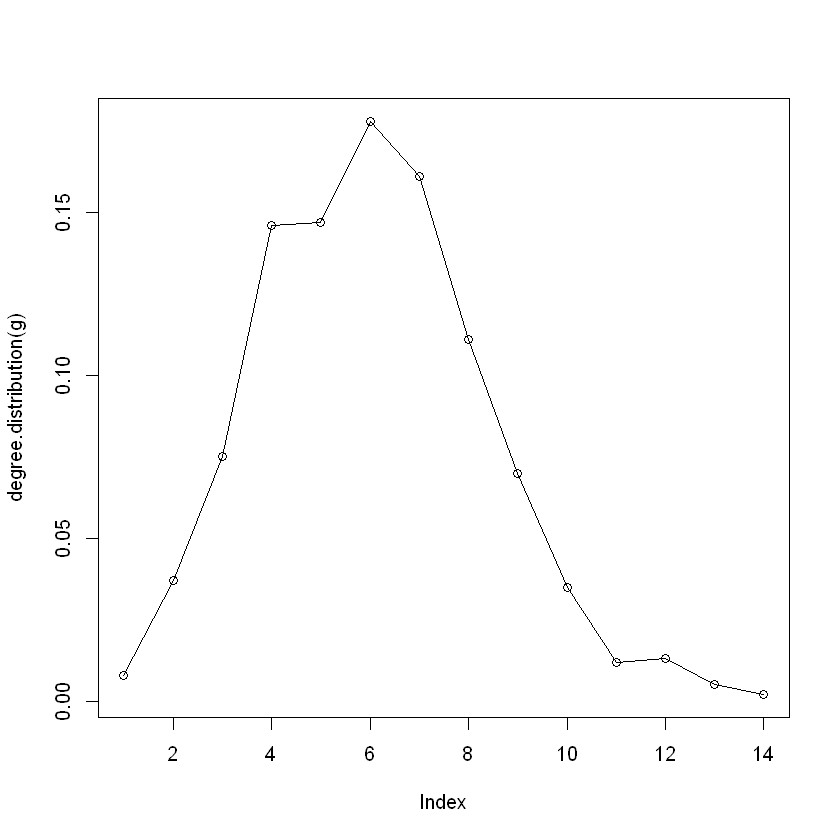

[1] TRUE
[1] "p=0.400: connected=TRUE, diameter=2"


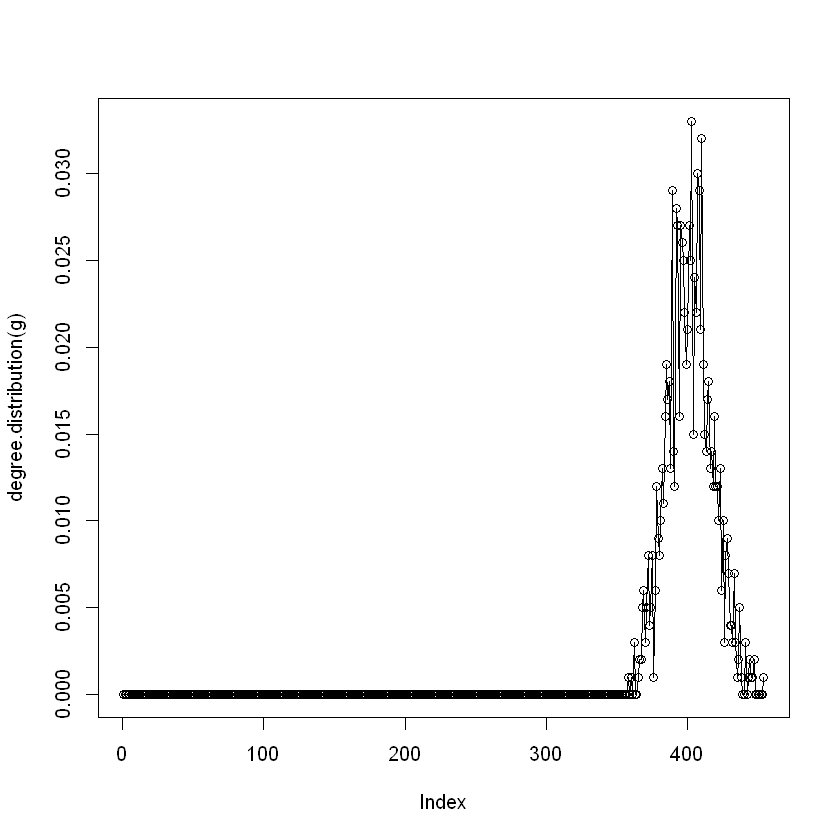

In [3]:
for (p in c(0.005,0.4))
{
    g <- erdos.renyi.game(1000, p, directed=F);
    plot(degree.distribution(g))
    lines(degree.distribution(g))
    print(is.connected(g))
    print(sprintf("p=%5.3f: connected=%s, diameter=%d", p, as.character(is.connected(g)), diameter(g)))
}

[1] TRUE

[1] 1.99

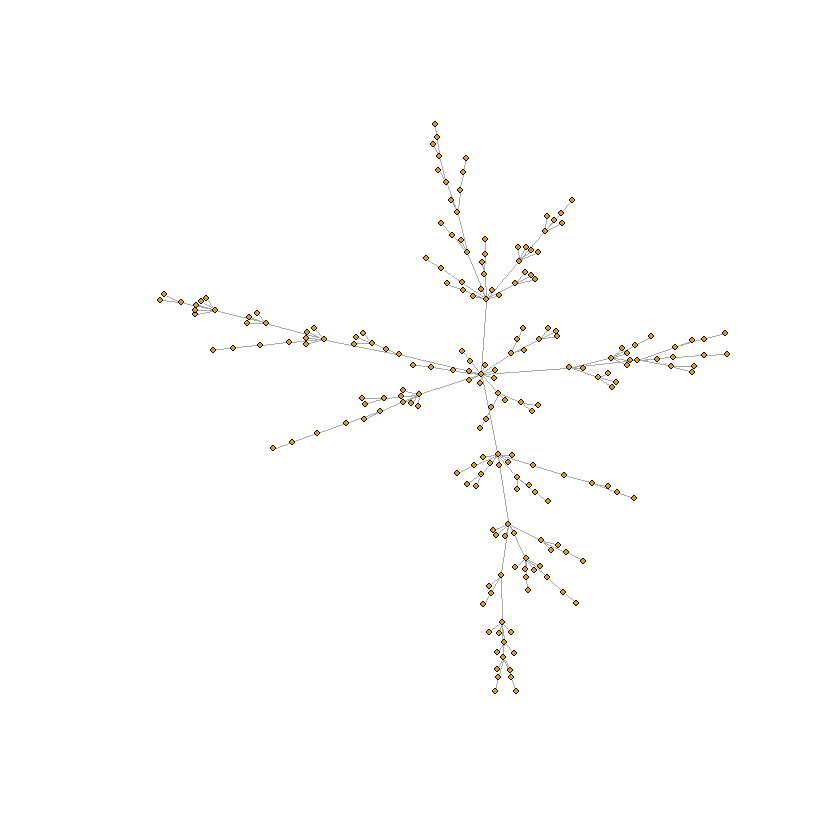

In [13]:
g <- barabasi.game(200,m=1, directed=F);
is.connected(g)
mean(degree(g))
g <- set.graph.attribute(g, "layout", layout.fruchterman.reingold(g))

plot(g, vertex.label="", vertex.size=2)

In [5]:
g <- barabasi.game(200, directed=F)


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"9 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" 不是一個繪圖參數"

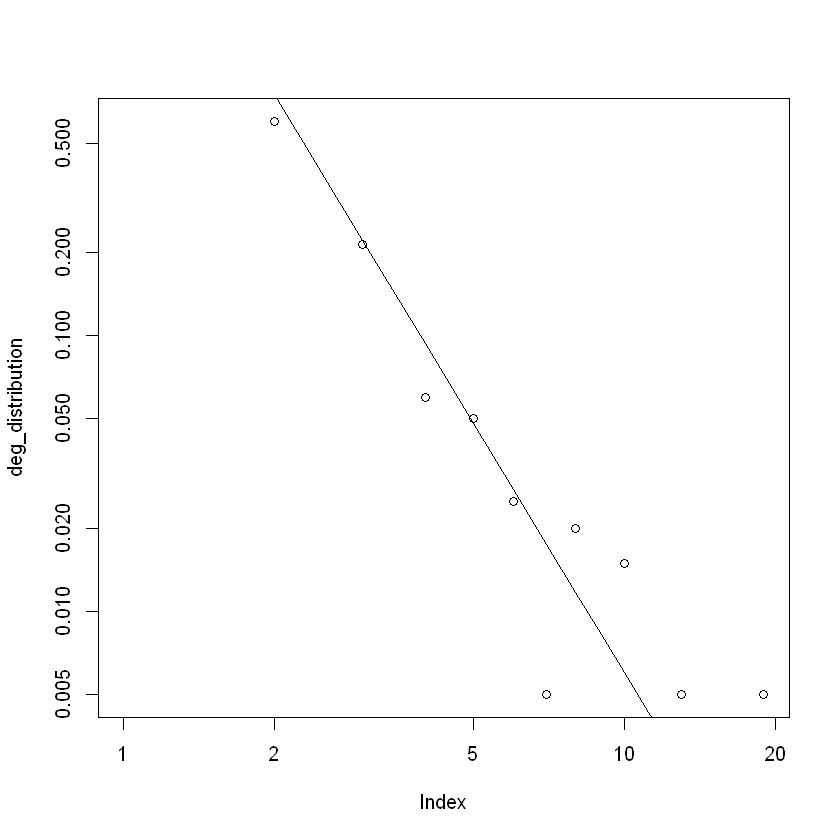

In [6]:
g <- barabasi.game(200, m=1,directed=F)
deg_distribution = degree.distribution(g)
plot(deg_distribution, log='xy')
lines(seq(1, length(deg_distribution)), 6*seq(1, length(deg_distribution))^(-3),main="Degree Distribution",xlab="Degree",ylab="Density", log='xy')

IGRAPH 62f4583 U--- 200 199 -- Aging Barabasi graph
+ attr: name (g/c), pa.exp (g/n), aging.exp (g/n), m (g/n), aging.bin
| (g/n), out.pref (g/l), zero.deg.appeal (g/n), zero.age.appeal (g/n),
| deg.coef (g/n), age.coef (g/n), time.window (g/n)
+ edges from 62f4583:
 [1]  1-- 2  2-- 3  3-- 4  4-- 5  5-- 6  6-- 7  7-- 8  8-- 9  9--10 10--11
[11] 11--12 12--13 13--14 14--15 15--16 16--17 17--18 18--19 19--20 20--21
[21] 21--22 22--23 23--24 24--25 25--26 25--27 27--28 28--29 29--30 30--31
[31] 31--32 32--33 33--34 34--35 35--36 36--37 37--38 38--39 39--40 40--41
[41] 41--42 42--43 43--44 35--45 45--46 46--47 47--48 48--49 49--50 50--51
[51] 51--52 52--53 53--54 54--55 55--56 56--57 57--58 58--59 59--60 60--61
+ ... omitted several edges


[1] TRUE

[1] 1.99

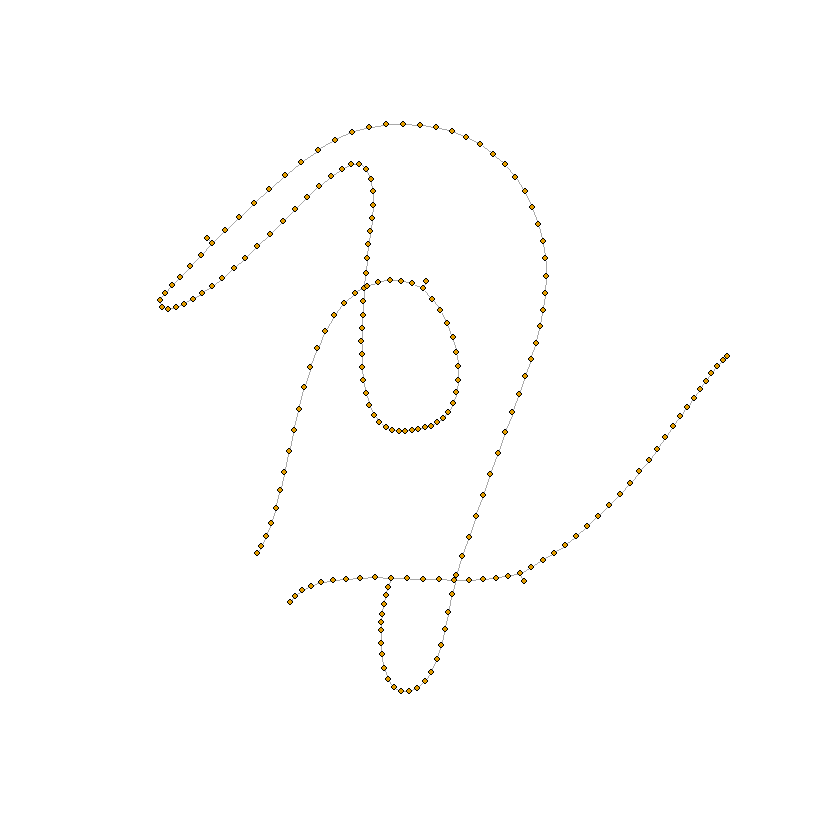

In [14]:
g <- aging.prefatt.game (200, directed=F, pa.exp=1, aging.exp=-5);
is.connected(g)
mean(degree(g))
g <- set.graph.attribute(g, "layout", layout.fruchterman.reingold(g))

plot(g, vertex.label="", vertex.size=2)

[1] TRUE

[1] 1.99

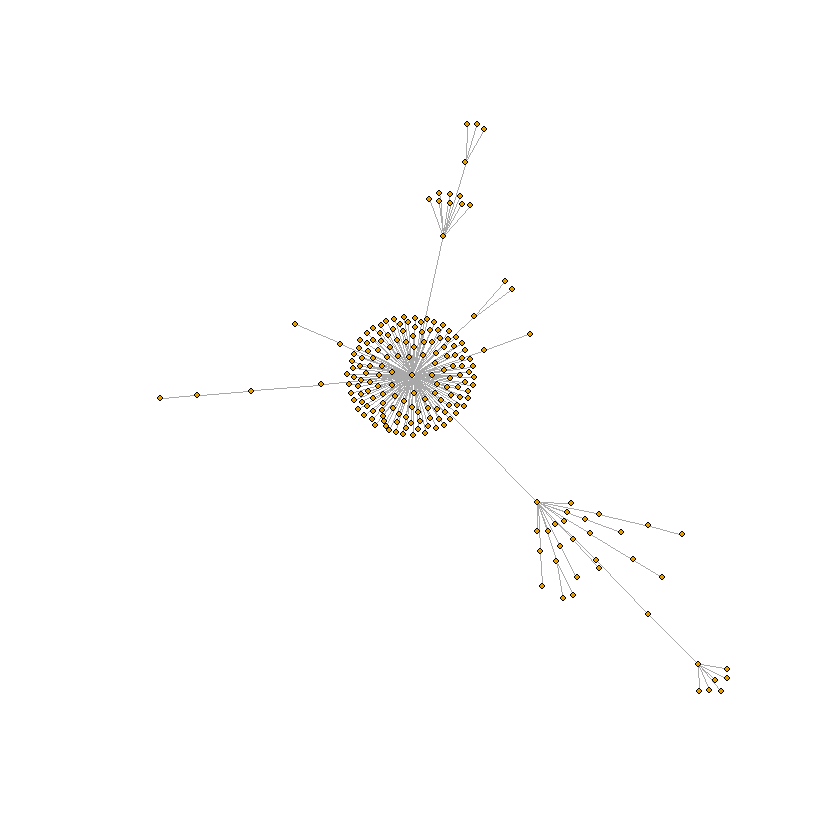

In [16]:
g <- aging.prefatt.game (200, directed=F, pa.exp=2, aging.exp=-0.5);
is.connected(g)
mean(degree(g))
g <- set.graph.attribute(g, "layout", layout.fruchterman.reingold(g))

plot(g, vertex.label="", vertex.size=2)

In [9]:
modularity(fastgreedy.community(g))

[1] 0.3664301

In [10]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

IGRAPH 3e16244 U--- 8 5 -- Erdos renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 3e16244:
[1] 1--3 4--6 1--7 6--7 6--8
8 x 8 sparse Matrix of class "dgCMatrix"
                                                  
[1,] .   . 0.5 .         . .   0.5000000 .        
[2,] .   1 .   .         . .   .         .        
[3,] 1.0 . .   .         . .   .         .        
[4,] .   . .   .         . 1.0 .         .        
[5,] .   . .   .         1 .   .         .        
[6,] .   . .   0.3333333 . .   0.3333333 0.3333333
[7,] 0.5 . .   .         . 0.5 .         .        
[8,] .   . .   .         . 1.0 .         .        


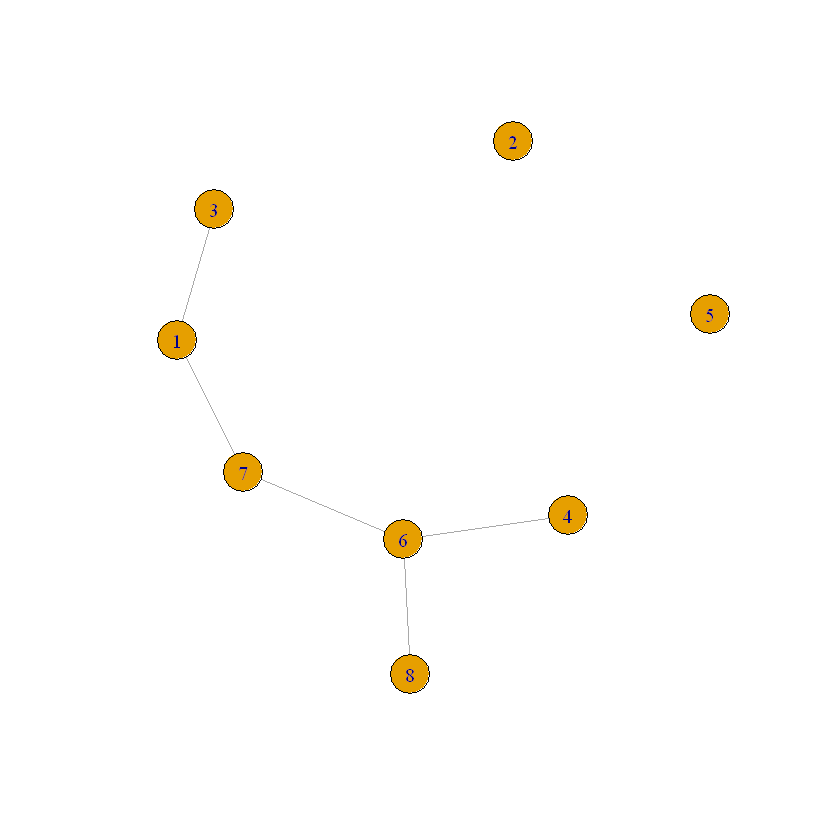

In [18]:
g = random.graph.game(8, 0.3)
plot(g)
print(g)
transition_matrix=create_transition_matrix(g)
print(transition_matrix)

In [65]:
start_node=1
for(i in 1:10){
    PMF = transition_matrix[start_node, ]
    next_node = sample(1:vcount(g), 1, prob = PMF)
    start_node=next_node
}
print(next_node)

ERROR: Error in sample.int(length(x), size, replace, prob): incorrect number of probabilities


In [81]:
pr = page_rank(g, damping = 0.85)$vector

In [84]:
pr

[1] 0.003211868 0.005792632 0.005441279 0.005245672 0.005136772 0.005076144
  [7] 0.005042392 0.005023601 0.005013139 0.005007315 0.005004072 0.005002267
 [13] 0.005001262 0.005000703 0.005000391 0.005000218 0.005000121 0.005000068
 [19] 0.005000038 0.005000021 0.005000012 0.005000006 0.005000004 0.005000002
 [25] 0.005000001 0.005000001 0.005000000 0.005000000 0.005000000 0.005000000
 [31] 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000
 [37] 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000
 [43] 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000
 [49] 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000 0.005000000
 [55] 0.005000000 0.005000000 0.004999999 0.004999999 0.004999998 0.004999997
 [61] 0.004999994 0.004999989 0.004999981 0.004999965 0.004999937 0.004999887
 [67] 0.004999798 0.004999636 0.004999347 0.004998827 0.004997893 0.004996215
 [73] 0.004993201 0.004987787 0.004978063 0.004960597 0.004929223 0.004872870
 [79] 0.007157471 0.005347084 0.003022511 0.004856448 0.004890584 0.007329152
 [85] 0.002826593 0.004936588 0.004964694 0.004980339 0.004989045 0.004993885
 [91] 0.004996567 0.004998037 0.004998814 0.004999173 0.004999240 0.004999038
 [97] 0.004998497 0.004997425 0.004995445 0.004991858 0.004985396 0.004973780
[103] 0.004952910 0.007373131 0.002839054 0.004952819 0.004973566 0.004984984
[109] 0.004991101 0.004994078 0.004994965 0.004994075 0.004991094 0.004984970
[115] 0.004973541 0.004952773 0.007373005 0.002839018 0.004952732 0.004973444
[121] 0.004984783 0.004990752 0.004993457 0.004993853 0.004992079 0.004987509
[127] 0.004978531 0.004961976 0.004932000 0.004878024 0.007171497 0.005353306
[133] 0.003025155 0.004878075 0.004932119 0.004962206 0.004978953 0.004988273
[139] 0.004993453 0.004996322 0.004997894 0.004998722 0.004999100 0.004999159
[145] 0.004998922 0.004998304 0.004997087 0.004994842 0.004990777 0.004983457
[151] 0.004970298 0.004946656 0.007356279 0.002834279 0.004928972 0.004928690
[157] 0.007354859 0.002833877 0.004944401 0.004965939 0.004975457 0.004976312
[163] 0.004968806 0.004950290 0.007371345 0.002838548 0.004952250 0.004973416
[169] 0.004985200 0.004991761 0.004995413 0.004997446 0.004998578 0.004999209
[175] 0.004999560 0.004999756 0.004999865 0.004999928 0.004999964 0.004999988
[181] 0.005000008 0.005000030 0.005000063 0.005000119 0.005000217 0.005000391
[187] 0.005000702 0.005001262 0.005002267 0.005004072 0.005007315 0.005013139
[193] 0.005023601 0.005042392 0.005076144 0.005136772 0.005245672 0.005441279
[199] 0.005792632 0.003211868

In [28]:
get_gcc1 = function(g){
    cl = clusters(g)
    gccindex = which.max(unlist(cl$csize))
    nongccs =(1:vcount(g))[cl$membership!=gccindex]
    gcc = delete.vertices(g, nongccs)
    
    return(gcc)
}
get_gcc2 <- function(g) {
    cl <- clusters(g)
    gcc <- induced_subgraph(g, which(cl$membership == which.max(cl$csize)))
    return(gcc)
}
n <- 100000
g <- sample_gnp(n, 2/n)
get_gcc1(g)

IGRAPH 69409d7 U--- 79472 95470 -- Erdos renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 69409d7:
 [1]  141-- 347  313-- 362   59-- 524  572-- 622  353-- 670  363-- 728
 [7]  618-- 735  222-- 790  286-- 850  737-- 981  211--1005  377--1069
[13]  489--1094  563--1151  795--1153  515--1232 1247--1258 1290--1304
[19] 1203--1306 1022--1322  127--1343  418--1348  296--1382 1142--1385
[25]  366--1404  122--1416   83--1420 1081--1422  921--1439  667--1461
[31] 1520--1579 1144--1616 1041--1617  709--1690 1407--1697 1395--1726
[37]   89--1732 1552--1733 1605--1754 1496--1800 1165--1828 1010--1851
[43] 1437--1851 1510--1889 1238--1905  373--1926  687--1936 1080--1958
+ ... omitted several edges